## Step 1: Load and Inspect the Data

In [5]:
# Import the pandas library, which is the standard tool for data analysis in Python
import pandas as pd

# Define the full path to your Excel file
# The 'r' before the string makes it a 'raw string', which handles backslashes correctly
file_path = r'C:\Users\user 1\Documents\Apollos\kenya-health-analysis\kenya-health-facilities-2017_08_02.xlsx'

# Load the Excel file into a pandas DataFrame
# A DataFrame is essentially a table where we can easily work with rows and columns
df_facilities = pd.read_excel(file_path)

# --- Initial Inspection ---

# 1. Display the first 5 rows to get a feel for the data and column names
print("First 5 rows of the dataset:")
print(df_facilities.head())
print("\n" + "="*50 + "\n") # Separator for clarity

# 2. Get a concise summary of the DataFrame
# This is the most important command for our first look. It tells us:
# - The number of rows and columns
# - The name and data type of each column
# - The number of non-null (i.e., not empty) values in each column
print("DataFrame Information:")
df_facilities.info()

First 5 rows of the dataset:
    Code                              Name Registration_number Keph level  \
0  22998               Kaka Medical Clinic                 NaN    Level 2   
1  22985                KOPANGA DISPENSARY                 NaN    Level 2   
2  22977           Fairview Medical Centre                 NaN    Level 2   
3  22976  RADIANT GROUP OF HOSPITALS-UMOJA                 NaN    Level 3   
4  22971             Songot Medical Clinic                 NaN    Level 2   

                              Facility type  \
0  Dispensaries and clinic-out patient only   
1        Basic primary health care facility   
2                  Secondary care hospitals   
3                  Secondary care hospitals   
4        Basic primary health care facility   

                                   Owner  \
0  Private Practice - Medical Specialist   
1                     Ministry of Health   
2         Private Practice - Unspecified   
3         Private Practice - Unspecified   
4   P

## Step 2: Data Cleaning

In [6]:
# --- Data Cleaning ---

# 1. Drop columns that are mostly empty or not needed for our analysis
columns_to_drop = ['Registration_number', 'Service_names', 'Regulatory body']
df_facilities_cleaned = df_facilities.drop(columns=columns_to_drop)

# 2. Handle minor missing data by dropping the few rows with null values in 'Keph level'
df_facilities_cleaned = df_facilities_cleaned.dropna(subset=['Keph level'])

# 3. Standardize column names: convert to lowercase and replace spaces/special chars with underscores
# This is a best practice that makes accessing columns much easier later on
df_facilities_cleaned.columns = df_facilities_cleaned.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

# --- Verification ---

# Let's check the result of our cleaning
print("Cleaned DataFrame Information:")
df_facilities_cleaned.info()

print("\n" + "="*50 + "\n")

# Display the first few rows to see the new column names
print("First 5 rows of the cleaned dataset:")
print(df_facilities_cleaned.head())

Cleaned DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8920 entries, 0 to 8931
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code                  8920 non-null   int64 
 1   name                  8920 non-null   object
 2   keph_level            8920 non-null   object
 3   facility_type         8920 non-null   object
 4   owner                 8920 non-null   object
 5   beds                  8920 non-null   int64 
 6   cots                  8920 non-null   int64 
 7   county                8920 non-null   object
 8   constituency          8920 non-null   object
 9   sub_county            8920 non-null   object
 10  ward                  8920 non-null   object
 11  operation_status      8920 non-null   object
 12  open_whole_day        8920 non-null   object
 13  open_public_holidays  8920 non-null   object
 14  open_weekends         8920 non-null   object
 15  open_late_ni

## Step 3: Exploratory Data Analysis (EDA)

EDA is where we start to uncover the stories hidden in the data. We'll slice, dice, and visualize the information to understand the healthcare landscape in Kenya. Let's start with a fundamental question:

**"Which counties have the most health facilities?"**

Answering this will give us our first major insight.

Top 10 Counties by Number of Health Facilities:
county
NAIROBI     780
MERU        429
KIAMBU      416
NAKURU      357
MACHAKOS    319
KITUI       309
NYERI       299
KAJIADO     270
KAKAMEGA    255
HOMA BAY    250
Name: count, dtype: int64




C:\Users\user 1\AppData\Local\Temp\ipykernel_16156\2899310860.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_counts.head(20).index, y=county_counts.head(20).values, palette="viridis")


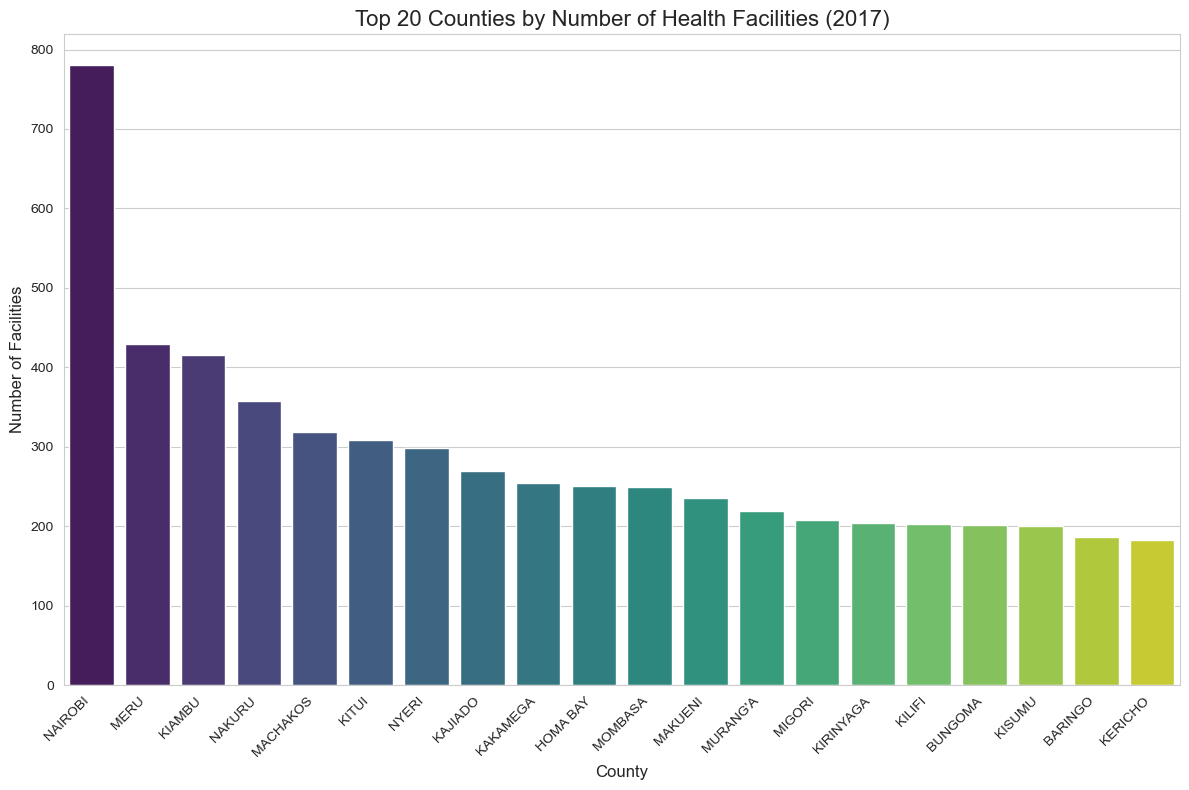

In [7]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analysis 1: Facilities per County ---

# Use the value_counts() method to count the occurrences of each unique county
county_counts = df_facilities_cleaned['county'].value_counts()

# Print the top 10 counties with the most health facilities
print("Top 10 Counties by Number of Health Facilities:")
print(county_counts.head(10))

print("\n" + "="*50 + "\n")

# --- Visualization ---

# Set the style and size for our plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot using seaborn for the top 20 counties
# We plot only the top 20 to keep the chart readable
sns.barplot(x=county_counts.head(20).index, y=county_counts.head(20).values, palette="viridis")

# Add titles and labels for clarity
plt.title('Top 20 Counties by Number of Health Facilities (2017)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

# Ensure the layout is tight and clean
plt.tight_layout()

# Display the plot
plt.show()

## Step 4: Deeper Analysis (Ownership & Facility Types)
Now that we know where the facilities are, let's find out who owns them and what type they are. This will add much-needed context to our analysis.

Let's answer two new questions:

1. What is the breakdown between public (Ministry of Health), private, and faith-based facilities?

2. What are the most common types of facilities (e.g., Dispensary, Health Centre)?

C:\Users\user 1\AppData\Local\Temp\ipykernel_16156\2350001044.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_counts.values, y=owner_counts.index, palette="plasma", ax=axes[0])
C:\Users\user 1\AppData\Local\Temp\ipykernel_16156\2350001044.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facility_type_counts.values, y=facility_type_counts.index, palette="magma", ax=axes[1])


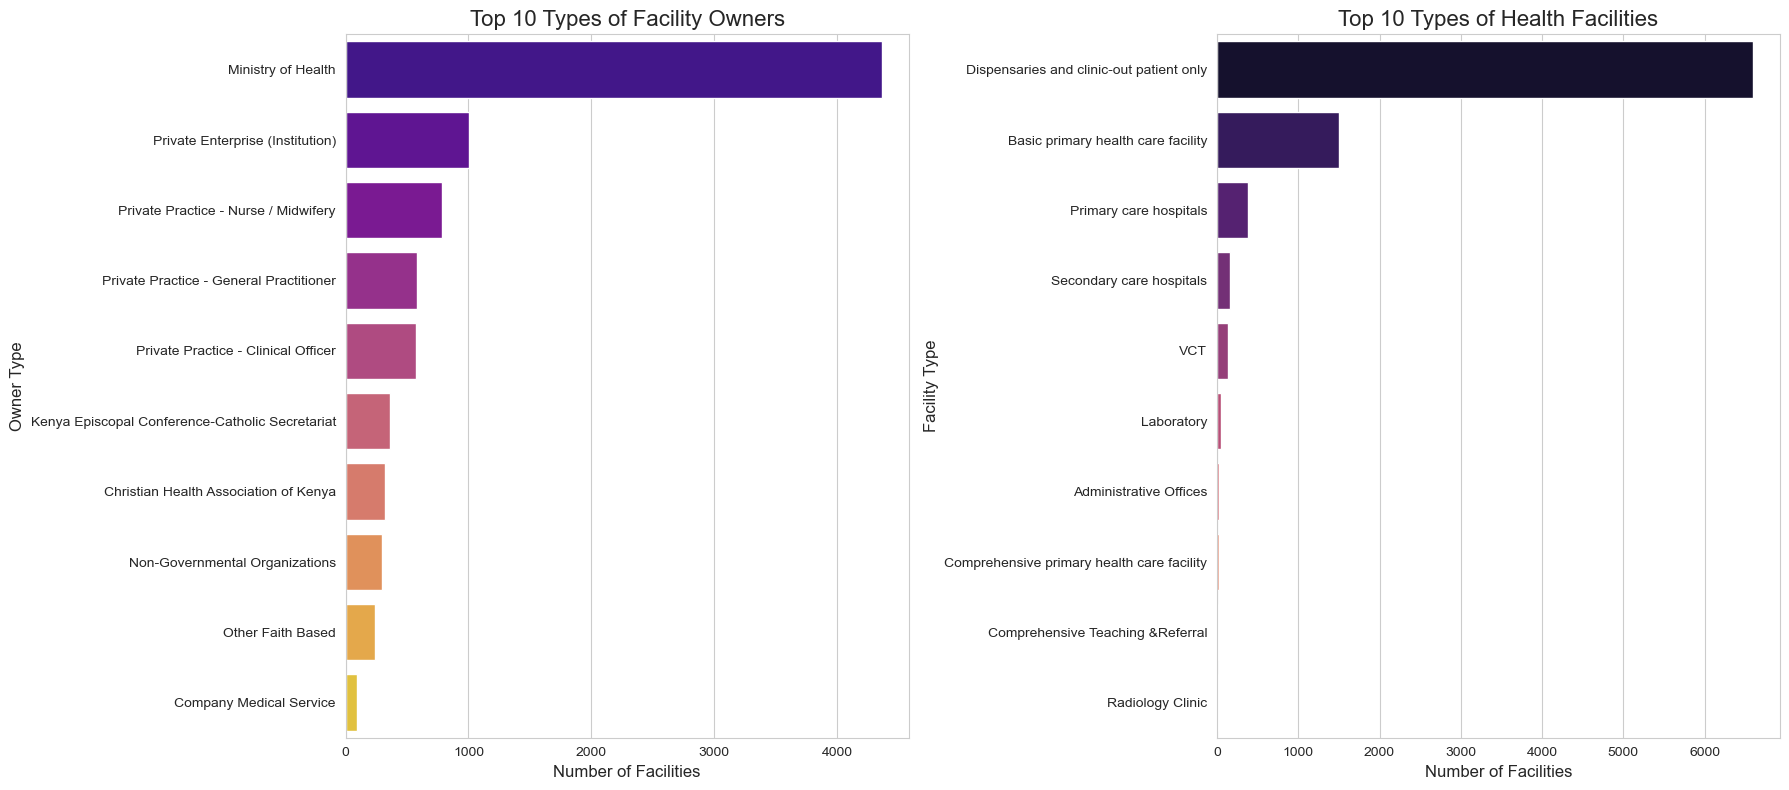

In [8]:
# --- Analysis 2: Ownership and Facility Types ---

# Set the plot style
sns.set_style("whitegrid")

# Create a figure with two subplots side-by-side
# This allows us to display two charts in a single output
fig, axes = plt.subplots(1, 2, figsize=(18, 8))


# --- Plot 1: Analysis of Facility Ownership ---

# Count the occurrences of each owner type
owner_counts = df_facilities_cleaned['owner'].value_counts().head(10)

# Create the bar plot for ownership
sns.barplot(x=owner_counts.values, y=owner_counts.index, palette="plasma", ax=axes[0])
axes[0].set_title('Top 10 Types of Facility Owners', fontsize=16)
axes[0].set_xlabel('Number of Facilities', fontsize=12)
axes[0].set_ylabel('Owner Type', fontsize=12)


# --- Plot 2: Analysis of Facility Type ---

# Count the occurrences of each facility type
facility_type_counts = df_facilities_cleaned['facility_type'].value_counts().head(10)

# Create the bar plot for facility types
sns.barplot(x=facility_type_counts.values, y=facility_type_counts.index, palette="magma", ax=axes[1])
axes[1].set_title('Top 10 Types of Health Facilities', fontsize=16)
axes[1].set_xlabel('Number of Facilities', fontsize=12)
axes[1].set_ylabel('Facility Type', fontsize=12)


# --- Final Touches ---

# Ensure the layout is tight and clean
plt.tight_layout()

# Display the plots
plt.show()

##  Step 5: Geospatial Analysis (Creating the Map)
Now, for the most impactful visualization. Let's create an interactive map to plot the location of every health facility.

In [11]:
# Let's inspect the columns of our GeoDataFrame to find the right one
print(gdf_counties.columns)

Index(['OBJECTID', 'AREA', 'PERIMETER', 'COUNTY3_', 'COUNTY3_ID', 'COUNTY',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [12]:
# --- Final Step (Corrected Code): Create a Choropleth Map ---

# 1. Prepare our facility count data (this part is unchanged)
county_data = county_counts.reset_index()
county_data.columns = ['county', 'facility_count']

# 2. Prepare our geospatial data with the CORRECT column name
# The county names in the GeoJSON might be in uppercase. Let's standardize both to ensure they match.
gdf_counties['county_upper'] = gdf_counties['COUNTY'].str.upper() # CORRECTED LINE
county_data['county_upper'] = county_data['county'].str.upper()

# 3. Merge the two DataFrames
# This adds the 'facility_count' to our GeoDataFrame, linking the number to the shape.
gdf_merged = gdf_counties.merge(county_data, on='county_upper')

# 4. Create the base map
kenya_choropleth_map = folium.Map(location=[0.5, 37.5], zoom_start=6)

# 5. Create the Choropleth layer
folium.Choropleth(
    geo_data=gdf_merged,
    name='choropleth',
    data=gdf_merged,
    columns=['county_upper', 'facility_count'],
    key_on='feature.properties.county_upper', # This tells Folium which property in the geo_data to use as the key
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Health Facilities per County'
).add_to(kenya_choropleth_map)

folium.LayerControl().add_to(kenya_choropleth_map)

# 6. Display the final map
kenya_choropleth_map

## Project Summary
This project provides a comprehensive analysis of the healthcare landscape in Kenya using the official Master Health Facility List (KMHFL) from August 2017. The primary goal was to clean, analyze, and visualize the data to uncover key patterns in the distribution, ownership, and types of health facilities across the country. The analysis involved data wrangling with Pandas, creating insightful charts with Matplotlib and Seaborn, and developing a final interactive choropleth map using GeoPandas and Folium. Key findings reveal a high concentration of facilities in Nairobi County, the dominance of the Ministry of Health as the primary owner, and a healthcare system structured around primary care dispensaries and outpatient clinics.